# Pandas

- 1. Introduction to Pandas
- 2. Pandas data structures: Series and DataFrame
    - 2.1 Create Series
	- 2.2 Create DataFrame
- 3. Loading in data
- 4. Data Inspection
- 5. Sorting
- 6. Selecting Data
	- 6.1 Simple selection
	- 6.2 Selection with .loc and .iloc
- 7. Masking
- 8. Statistics, groupby, aggregation
- 9. Missing values
	- 9.1 Method chaining
	- 9.2 The axis argument
- 10. Plotting
- 11. Drop / Delete rows
- 12. Next steps

# 1. Introduction to Pandas

Pandas is a powerful Python library which makes it easy to load, manipulate, analyze, model and visualize structured data.

Structured data comes in a tabular format, just like an Excel sheet with rows and columns, where:
- all rows have the same columns (can be empty)
- all values within a column have the same datatype

In [ ]:
# If Pandas library is not installed, we do it here
%pip install pandas

In [1]:
# First step is to import the library, so we can work with it
import pandas as pd

# 2. Pandas data structures: Series and DataFrame

A Pandas __Series__ is a labeled, one-dimensional array that holds the same type of data (just like a numpy array).<br> The available datatypes can be numbers, strings, dates, and more.<br> Each element in a Series has a corresponding __label or index__, which allows for more intuitive data access and manipulation.

A Pandas __DataFrame__ is a two-dimensional, tabular data structure.<br>It's designed to handle labeled and structured data.

Think of a Series as a column in an Excel sheet, and a DataFrame as a collection of Series columns.

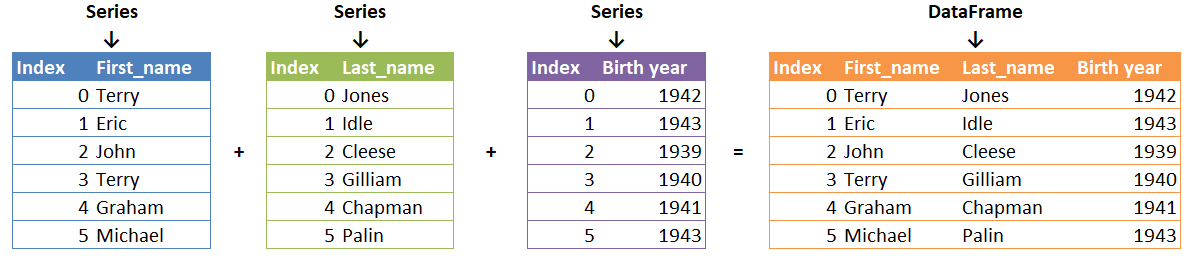

### 2.1 Create Series
Can be created from Lists or Dictionary

In [10]:
# Create Series from List
values = [10, 20, 30, 40, 50]
labels = ['Bacon', 'Eggs', 'Spam', 'Beans', 'Sausage']
series = pd.Series(data=values, index=labels, name='Price')

series

# # Create Series from Dictionary
# values_2 = {'Bacon':10, 'Eggs':20, 'Spam':30, 'Beans':40, 'Sausage':50}
# pd.Series(values_2) # Note: this result is not saved

Bacon      10
Eggs       20
Spam       30
Beans      40
Sausage    50
Name: Price, dtype: int64

### 2.2 Create DataFrame
Can be created from Lists or Dictionary

In [11]:
# Create DataFrame From dictionary
data = {'Name':['egg', 'bacon', 'sausage', 'spam'], 'Price':[5, 8, 9, 1], 'Quality':[3, 4, 4, 1]}
df = pd.DataFrame(data=data, index = [0, 1, 2, 3])
df

# Same dataframe created from list of lists
# data = [
#     ['egg', 5, 3],
#     ['bacon', 8, 4],
#     ['sausage', 9, 4],
#     ['spam', 1, 1]
# ]

# df = pd.DataFrame(data=data, columns=['Name', 'Price', 'Quality'], index=[0, 1, 2, 4])
# df

,Name,Price,Quality
0,egg,5,3
1,bacon,8,4
2,sausage,9,4
3,spam,1,1


# 3. Loading in data
Pandas can read many tpyes of source data, such as .csv, .xlsx, .json files, SQL databeses, Web APIs, HTML tables

In [2]:
data_path = 'D:\#teach\Pandas\datasets\Automobile.csv'
df = pd.read_csv(data_path)

# 4. Data Inspection
It is good practice to inspect our data after loading in, to see:
- if the loading went well
- we loaded the right data
- check for obvious data errors
- see what we have to work with

In [13]:
df.head(7) # Note: Default is first 5 rows

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa


In [14]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [15]:
df.shape

(398, 9)

In [16]:
df.size

3582

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [19]:
df.describe(include='object')

,name,origin
count,398,398
unique,305,3
top,ford pinto,usa
freq,6,249


# 5. Sorting 
We can sort the DataFrame based on specific columns, or by row index.<br>
We can sort in __ascending__ or descending order, and make the sorting permanent by using the __inplace__ argument

In [20]:
df.sort_values(by='mpg', ascending=False, inplace=True)
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan
329,honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,80,japan
325,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
326,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe
...,...,...,...,...,...,...,...,...,...
103,chevrolet impala,11.0,8,400.0,150.0,4997,14.0,73,usa
67,mercury marquis,11.0,8,429.0,208.0,4633,11.0,72,usa
25,ford f250,10.0,8,360.0,215.0,4615,14.0,70,usa
26,chevy c20,10.0,8,307.0,200.0,4376,15.0,70,usa


We can revert back this sorting simply by sorting by the index

In [21]:
df.sort_index(inplace=True)
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


# 6. Selecting Data
There are many ways for selecting data with Pandas.<br>

### 6.1 Simple selection

In [22]:
# Simple column selection
df['name']

# Alternative column selection
df.name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [23]:
# Simple selection of multiple columns
df[['name', 'model_year']]

,name,model_year
0,chevrolet chevelle malibu,70
1,buick skylark 320,70
2,plymouth satellite,70
3,amc rebel sst,70
4,ford torino,70
...,...,...
393,ford mustang gl,82
394,vw pickup,82
395,dodge rampage,82
396,ford ranger,82


In [84]:
# Simple row selection
df[0:4] # Note: slicing here works identical to list slicing

# Simple row and column selection
df[0:4][['name', 'model_year']]

,name,model_year
0,chevrolet chevelle malibu,70
1,buick skylark 320,70
2,plymouth satellite,70
3,amc rebel sst,70


### 6.2 Selection with .loc and .iloc

.loc and .iloc helps us to select specific rows and columns, or a range of rows and columns.<br>
__.loc__ → uses column/index label names for selection. NOTE: if we have a numeric index, the label name is the index number <br>
__.iloc__ → uses column/index position numbers for selection.

When defining the selection the general format of selection is:<br>
.loc[row(s), column(s)]<br>
.iloc[row(s), column(s)]

For selection definition we can provide:
- individual values (example: 0, 'name', etc.)
- multiple individual values in a list format (example: [2, 5, 8, 42], ['name', 'displacement', 'origin'])
- slices, as seen with lists (example: 4:8, 'mpg':'weight')

An important difference between Simple selection and Selection with .loc is that slicing with <br>.loc is __INCLUSIVE__, while <br>.iloc is __EXCLUSIVE__, just like regulat list slicing

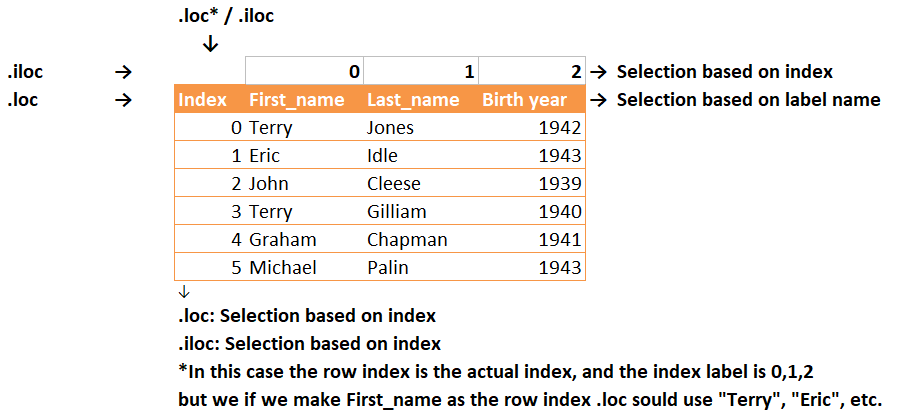

### .loc → selection by row / column label names

In [86]:
# # Locate the first row, and all its columns (by default)
df.loc[0]

# # # Alternative to the above
df.loc[0, :]

name            chevrolet chevelle malibu
mpg                                  18.0
cylinders                               8
displacement                        307.0
horsepower                          130.0
weight                               3504
acceleration                         12.0
model_year                             70
origin                                usa
Name: 0, dtype: object

In [87]:
# Locate all rows, and the 'mpg' column
df.loc[:, 'mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [88]:
# Locate the first row, and its name column
df.loc[0, 'name']

'chevrolet chevelle malibu'

In [90]:
# # Locate rows from 4 to 8 (inclusive!), and the columns 'name', 'mpg', 'origin'
df.loc[4:8, ['name', 'mpg', 'origin']]

# # Locate rows 2, 5, 8, 42, and columns from 'mpg' to 'weight'
df.loc[[2, 5, 8, 42], 'mpg':'weight']

,mpg,cylinders,displacement,horsepower,weight
2,18.0,8,318.0,150.0,3436
5,15.0,8,429.0,198.0,4341
8,14.0,8,455.0,225.0,4425
42,12.0,8,383.0,180.0,4955


### .iloc → same logic as .loc but we select by row / column position

In [92]:
# # Locate the first row, and all its columns
df.iloc[0]

# # Alternative to the above
df.iloc[0, :]

name            chevrolet chevelle malibu
mpg                                  18.0
cylinders                               8
displacement                        307.0
horsepower                          130.0
weight                               3504
acceleration                         12.0
model_year                             70
origin                                usa
Name: 0, dtype: object

In [93]:
# Locate all rows, and the 'mpg' column (has index 1 in the df.columns 'list')
df.iloc[:, 1]

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [94]:
# Locate the first row, and its name column
df.iloc[0, 0]

'chevrolet chevelle malibu'

In [96]:
# # Locate rows from 4 to 8 (inclusive!), and the columns 'name', 'mpg', 'origin'
df.iloc[4:8, [0, 1, -1]] # -1 or 8 would give the same result as they both refer to 'origin'

# # Locate rows 2, 5, 8, 42, and columns from 'mpg' to 'weight'
df.iloc[[2, 5, 8, 42], 1:6]

,mpg,cylinders,displacement,horsepower,weight
2,18.0,8,318.0,150.0,3436
5,15.0,8,429.0,198.0,4341
8,14.0,8,455.0,225.0,4425
42,12.0,8,383.0,180.0,4955


# 7. Masking
Masking is a powerful way to filter and select data.<br>
One can think of it as an answer sheet for tests, where we put this sheet on top of the test and there is a circle at the right answer.<br>
In the case of Pandas, we put this sheet on top of the DataFrame, and where the answer is right, - where a condition is filled - we give a True boolean value, otherwise a False value.

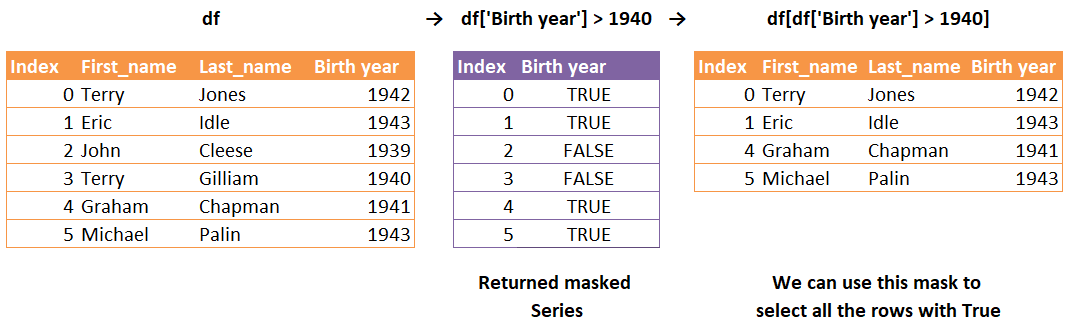

In [97]:
# Return a Series mask
df.cylinders > 4

0       True
1       True
2       True
3       True
4       True
       ...  
393    False
394    False
395    False
396    False
397    False
Name: cylinders, Length: 398, dtype: bool

In [98]:
# Return the rows based on the mask → all cars with more than 4 cylinders
df[df.cylinders > 4]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
365,ford granada gl,20.2,6,200.0,88.0,3060,17.1,81,usa
366,chrysler lebaron salon,17.6,6,225.0,85.0,3465,16.6,81,usa
386,buick century limited,25.0,6,181.0,110.0,2945,16.4,82,usa
387,oldsmobile cutlass ciera (diesel),38.0,6,262.0,85.0,3015,17.0,82,usa


In [99]:
# Masking can get as complex as you want - all the cars with more than 4 cylinders and under 20 mpg and from mocel_year 70
df[(df.cylinders > 4) & (df.mpg < 20) & (df.model_year == 70)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa


# 8. Statistics, groupby, aggregation
__Statistics__: As Pandas is built upon the Numpy library, it can also calculate simple statistics, such as: sum, min, max, mean, mode, median.

In [100]:
print(f"The mean miles per gallon is: {df['mpg'].mean()}")
print(f"The minimum miles per gallon is: {df['mpg'].min()}")
print(f"The maximum miles per gallon is: {df['mpg'].max()}")
print(f"The mode (most occuring) miles per gallon is: {df['mpg'].mode()[0]}")
print(f"The median miles per gallon is: {df['mpg'].median()}")

The mean miles per gallon is: 23.514572864321607
The minimum miles per gallon is: 9.0
The maximum miles per gallon is: 46.6
The mode (most occuring) miles per gallon is: 13.0
The median miles per gallon is: 23.0


__Groupby__: We can combine these statistics with the groupby method, to get insights and statistics of different groups in the data.<br>The groupby method returns a generator-like object, which is not useful in itself, but it is very powerful when we use aggregations with it.

In [101]:
# Groupby by itself returns a DataFrameGroupBy object
df.groupby('origin')

In [102]:
# We group the rows by origin, select the mpg column and take the mean of the whole group
df.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [105]:
# Defining the columns and aggregations we want
aggregation_functions = {
    'mpg': 'mean',
    'acceleration': ['min', 'max', 'mean'],
    'horsepower': 'median'
}

# Grouping the data by origin, and using the defined aggregations 
df.groupby('origin').agg(aggregation_functions)

# Same result - might be more easy to read
df.groupby('origin').agg({'mpg': 'mean', 'acceleration': ['min', 'max', 'mean'], 'horsepower': 'median'})

mpg acceleration                  horsepower
             mean          min   max       mean     median
origin                                                    
europe  27.891429         12.2  24.8  16.787143       76.5
japan   30.450633         11.4  21.0  16.172152       75.0
usa     20.083534          8.0  22.2  15.033735      105.0

# 9. Missing values
Pandas can use the Nan values from Numpy, where Nan stands for Not a Number. This is a common way to define unknown / missing values.

Important methods:
- isna() → check if there are Nan values
- fillna() → fill cells which have Nan values
- dropna() → delete rows which have Nan values

### 9.1 Method chaining
Here we can see an example of chaining multiple Pandas methods after eachother, which is easy to read and very powerful.

In [121]:
# Are there any missing values in our data?
df.isna().any()

name            False
mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [122]:
# Checking for missing data in the DataFrame rows
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [123]:
# Checking for missing data in horsepower column specifically
df.horsepower.isna().sum()

6

In [124]:
# Filtering the rows with Nan values
df[df.isna().any(axis=1)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


In [125]:
# # Filling the Nan values in horsepower with the median of horsepower
df.horsepower.fillna(df.horsepower.median(), inplace=True)
df.iloc[[32, 126,330, 336, 354, 374], :]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,93.5,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,93.5,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,93.5,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,93.5,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,93.5,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,93.5,3035,20.5,82,usa


In [126]:
# Reloading the DataFrame
df = pd.read_csv(data_path)

# Checking the shape of the DataFrame before dropna()
print(f'The shape of the DataFrame before dropna() is called is: {df.shape}')

# Deleting the rows which have Nan values
df.dropna(inplace=True)

print(f'The shape of the DataFrame after dropna() is called is: {df.shape}')


The shape of the DataFrame before dropna() is called is: (398, 9)
The shape of the DataFrame after dropna() is called is: (392, 9)


### 9. 2 The axis argument
Most of the row-; and column-wise operations have the __axis__ argument in them. The __axis__ argument in Pandas can take the value of 0 and 1.<br>While it is counter-intuitive, axis = 0 is a row-wise operation, and axis = 1 is a column-wise operation.

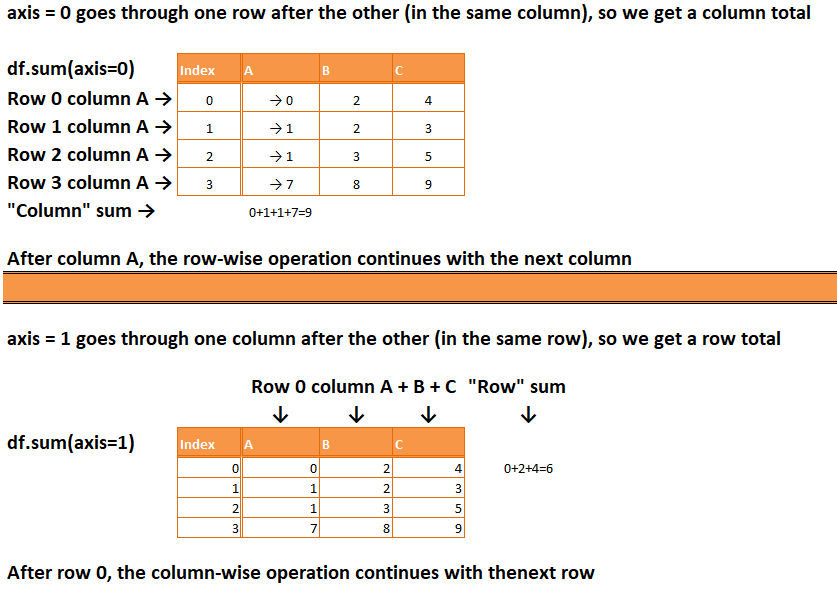

#### Simple example of the axis concept

In [127]:
# Create an all numeric DataFrame
data = {'A':[0, 1, 1, 7], 'B':[2, 2, 3, 8], 'C':[4, 3, 5, 9]}
test = pd.DataFrame(data=data, index=[0, 1, 2, 3])
test

,A,B,C
0,0,2,4
1,1,2,3
2,1,3,5
3,7,8,9


In [128]:
# Row-wise operation creates a "column-sum"
# We go through row-after-row per each column, and sum the values, see the index on the left of the sums.
test.sum(axis=0)

A     9
B    15
C    21
dtype: int64

In [129]:
# Column-wise operation creates a "row-sum"
# We go through column-after-column per each row, and sum the values, see the index on the left of the sums.
test.sum(axis=1)

0     6
1     6
2     9
3    24
dtype: int64

# 10. Plotting

Pandas has a built in visualization, which is based on the Matplotlib library.<br>__NOTE__: We need to import the matplotlib library in order to use the .plot() method in Pandas

In [130]:
import matplotlib.pyplot as plt

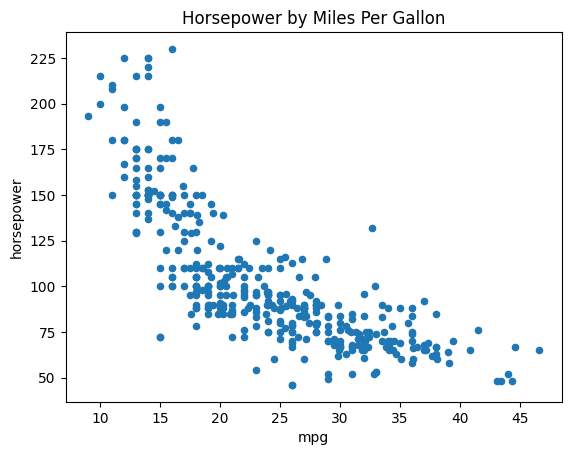

In [131]:
# Scatter plot
df.plot(x='mpg', y='horsepower', kind='scatter', title='Horsepower by Miles Per Gallon')
plt.show()

# Alternative to the above code:
df.plot.scatter(x='mpg', y='horsepower', title='Horsepower by Miles Per Gallon')

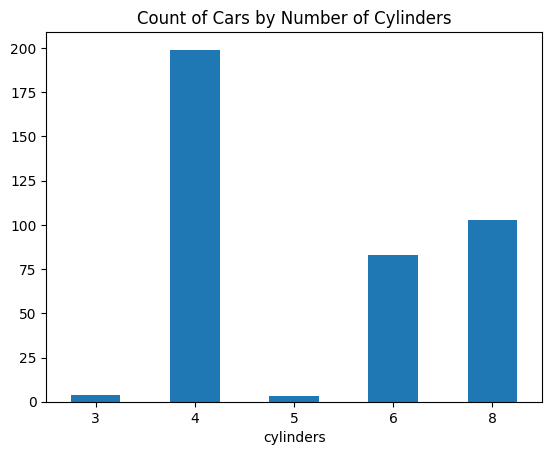

In [132]:
# Bar plot 
# NOTE the method chaining again
df.cylinders.value_counts().sort_index(ascending=True).plot(x='cylinders', kind='bar', title='Count of Cars by Number of Cylinders')
plt.xticks(rotation=0)
plt.show()

# 11. Drop / Delete rows

We can drop (delete) rows and columns from a Dataframe in two different ways:
- Filtering and saving into a new DataFrame
- Using the .drop() method

In [133]:
# Filter and save
above_100_hp_df = df[df.horsepower >= 100]
above_100_hp_df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
362,datsun 810 maxima,24.2,6,146.0,120.0,2930,13.8,81,japan
363,buick century,22.4,6,231.0,110.0,3415,15.8,81,usa
364,oldsmobile cutlass ls,26.6,8,350.0,105.0,3725,19.0,81,usa
386,buick century limited,25.0,6,181.0,110.0,2945,16.4,82,usa


In [134]:
# .drop method
# NOTE inplace is set to False by default, so the above code does not modify the original DataFrame
df.drop('mpg', axis=1)

,name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,ford mustang gl,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,4,120.0,79.0,2625,18.6,82,usa


# 12. Next steps

The above introduction touched on the most important and commonly used topics in Pandas, but it is only the surface of what Pandas is capable of.<br>A non-exhaustive list of the further capabilities of Pandas:
- Duplicate handling
- Merging/joining/appending tables
- Pivoting DataFrames
- Splitting / extracting strings
- Extracting information from dates
- Converting datatypes
- Calculating correlations
<br>...and the list can just go on and on.<br>Whatever You want to do with data, it is most likely possible to achieve it using Pandas.<br>For an exhaustive list and detailed explanation of all the attributes and methods used in Pandas, please visit<br>https://pandas.pydata.org/docs/user_guide/index.html#user-guide